# Ted Jacquet
Final Project\
Stock Projection

This final project aims to create a relationship between the performance of the top 3 market indices: S&P500, NASDAQ, DOW JONES, with the stock Ford (F). 

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [31]:

# import modules
import csv
import pandas as pd
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt

symb_list = ["F", "INDEXSP", "NASDAQ", "INDEXDJX"]


data_list = []

# initialize parameters
start_date = datetime(2017, 1, 1)
end_date = datetime(2022, 11, 8)


# get the data
ford_data = pd.DataFrame(yf.download('F', start = start_date, end = end_date))
nasdaq_data = pd.DataFrame(yf.download('^IXIC', start = start_date, end = end_date))
snp_data = pd.DataFrame(yf.download('^GSPC', start = start_date, end = end_date))
dowj_data = pd.DataFrame(yf.download('^DJI', start = start_date, end = end_date))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [67]:
ford2 = ford_data["Close"]

nasdaq2 = nasdaq_data["Close"]
snp2 = snp_data["Close"]
dowj2 = dowj_data["Close"]

header_list = ["ford_close","nasdaq_close","snp_close","doj_close"]
frames = [ford2, nasdaq2, snp2, dowj2]

result = pd.concat(frames, axis=1)

result.columns = header_list

In [68]:
result.head()

,ford_close,nasdaq_close,snp_close,doj_close
Date,,,,
2017-01-03,12.59,5429.080078,2257.830078,19881.759766
2017-01-04,13.17,5477.000000,2270.750000,19942.160156
2017-01-05,12.77,5487.939941,2269.000000,19899.289062
2017-01-06,12.76,5521.060059,2276.979980,19963.800781
2017-01-09,12.63,5531.819824,2268.899902,19887.380859


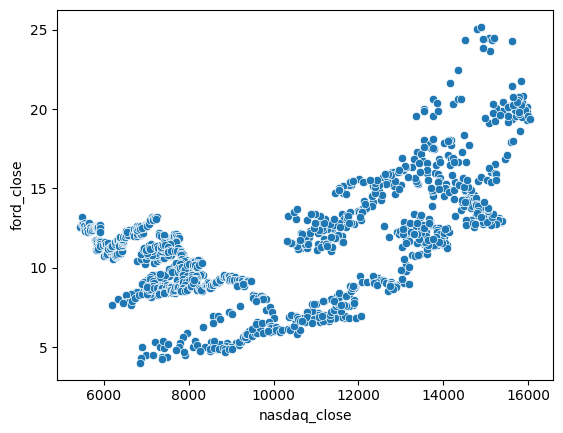

In [70]:
nasdaq_ford = sns.scatterplot(x = "nasdaq_close", y = "ford_close", data = result)

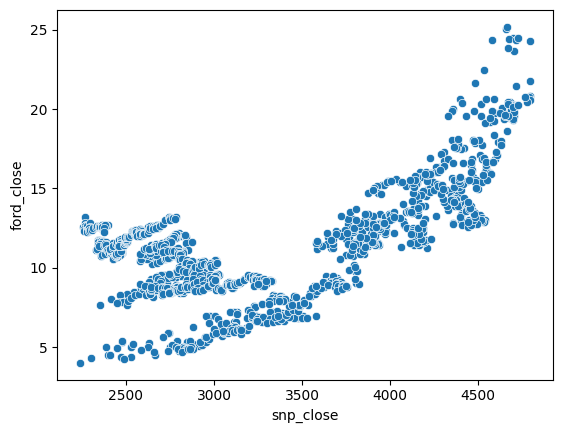

In [71]:
snp_ford = sns.scatterplot(x = "snp_close", y = "ford_close", data = result)

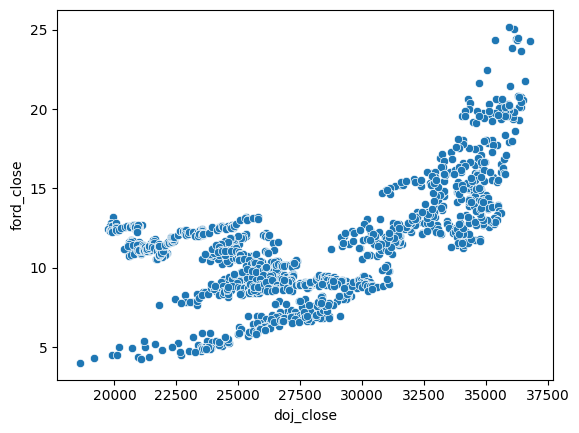

In [72]:
doj_ford = sns.scatterplot(x = "doj_close", y = "ford_close", data = result)

In [76]:
#Define cool/useful/funny as the features, and stars as the response.
x = result.drop('ford_close',axis= 1)
y = result['ford_close']
print(x)
print(y)

##To do this part onwards, i made use of some online materials from GeekForGeeks

            nasdaq_close    snp_close     doj_close
Date                                               
2017-01-03   5429.080078  2257.830078  19881.759766
2017-01-04   5477.000000  2270.750000  19942.160156
2017-01-05   5487.939941  2269.000000  19899.289062
2017-01-06   5521.060059  2276.979980  19963.800781
2017-01-09   5531.819824  2268.899902  19887.380859
...                  ...          ...           ...
2022-11-01  10890.849609  3856.100098  32653.199219
2022-11-02  10524.799805  3759.689941  32147.759766
2022-11-03  10342.940430  3719.889893  32001.250000
2022-11-04  10475.250000  3770.550049  32403.220703
2022-11-07  10564.519531  3806.800049  32827.000000

[1473 rows x 3 columns]
Date
2017-01-03    12.59
2017-01-04    13.17
2017-01-05    12.77
2017-01-06    12.76
2017-01-09    12.63
              ...  
2022-11-01    13.40
2022-11-02    13.06
2022-11-03    13.26
2022-11-04    13.51
2022-11-07    13.70
Name: ford_close, Length: 1473, dtype: float64


In [78]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=101)
# creating a regression model
model = LinearRegression()
# fitting the model to the dataset
model.fit(X_train,y_train)

LinearRegression()

Coefficients:  [-0.00271313  0.02035508 -0.00099448]
Variance score: 0.5430230897606174


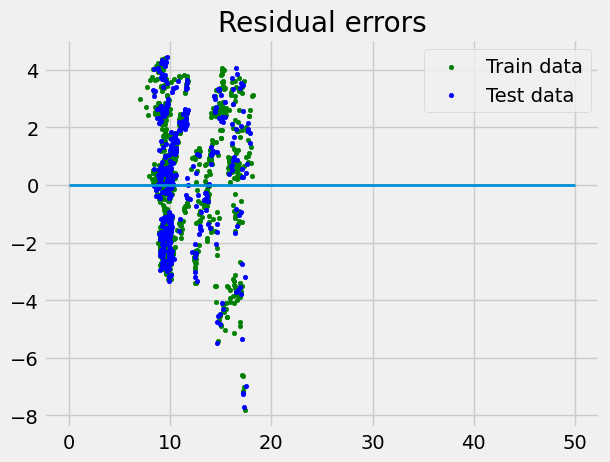

In [79]:
#i found this code from geekfromgeeks
# regression coefficients
print('Coefficients: ', model.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(model.score(X_test, y_test)))
  
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

In [80]:
# making predictions from the model
predictions = model.predict(X_test)

In [81]:
#Evaluation the model
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  5.100694021347566
mean_absolute_error :  1.8859842839462635
